# 1 Installing the Required Packages

To install the packages used in this study, please create a fresh virtual environment for your preferred Python version (we tested with Python 3.9) and then install all required packages in the file `scripts/requirements.txt`.

```shell
$ pip install -r requirements.txt
```

As a second step, to access the data in the study, you need to install the CLDF/Lexibank package itself. We are assume that you are located in the folder `scripts`, so we first take one step "upstairs":

```shell
$ cd .. 
```

And now, we install the package `lexibank_panobodyparts`:

```shell
$ pip install -e .
```

And we take directly one step back into our scripts folder again.

# 2 Loading the Data

We use the Pandas library to load the data. To access the file, which is located in the folder `raw` of our Lexibank package, we need to retrieve the path by loading the CLDF package first.

In [1]:
import pandas as pd
from lexibank_panobodyparts import Dataset

data_path = str(Dataset().raw_dir.joinpath("body-parts en pano.xlsx"))
df_all = pd.ExcelFile(data_path)

In [2]:
df_all

When loading all sheet names, we need to exclude those that are not part of our analysis (there is one superfluous sheet with name `Hoja1` which we ignore).

In [3]:
names = [name for name in df_all.sheet_names if not name.startswith("Hoja1")]

We now check that we have indeed 25 concepts in our data and also create a Python dictionary that stores the actual data for each sheet.

In [4]:
df_map = {}
for i, name in enumerate(names):
    print("{0:5} : {1}".format(i+1, name))
    df_map[name] = df_all.parse(name)

    1 : head
    2 : hair
    3 : ear
    4 : eye
    5 : nose
    6 : boca
    7 : tongue
    8 : tooth
    9 : neck
   10 : bellly
   11 : back
   12 : skin
   13 : tail
   14 : leg
   15 : foot
   16 : wing
   17 : hand
   18 : feather
   19 : corazon
   20 : guts
   21 : liver
   22 : bone
   23 : carne
   24 : grasa
   25 : blood


We now have access to all sheets (as they are given in the Excel data).

In [5]:
df_map["head"]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,ROOT,ROOT.1,FORMATIVE,FORMATIVE.1,FORMATIVE.2,FORMATIVE.3
0,ID,DOCULECT,CONCEPT,SPANISH,VALUE,FORM,TOKENS,MORPHEMES,COGIDS,NOTES,77,81,180,184,76,79
1,534,Matis,head,cabeza,maʂo,maʂo,m a + ʂ o,head _ʂo,77 180,NaN,1,0,1,1,0,0
2,533,Matses,head,cabeza,mapi,mapi,m a + p i,head _pi,77 184,NaN,1,0,0,0,0,0
3,535,Marubo,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,NaN,1,0,0,0,1,0
4,536,Katukina,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,NaN,1,0,0,0,1,0
5,537,Kanamari,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,!,1,0,0,0,1,0
6,538,Shipibo_Konibo,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,NaN,1,0,0,0,1,0
7,539,Kapanawa,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,!,1,0,0,0,1,0
8,540,Arara,head,cabeza,bapu,bapu,b a + p u,head _pu,77 76,NaN,1,0,0,0,1,0
9,542,Shanenawa,head,cabeza,mapu,mapu,m a + p u,head _pu,77 76,NaN,1,0,0,0,1,0


We now extract the relevant columns from the data. They can be found in the second column (column DOCULECT, called `Unnamed:1` in Pandas, and in all following columns that have `ROOT` or `FORMATIVE` as label (Pandas adds numeric idendifiers to repeating column names here). Since we want to ignore all additional information, we will just overwrite all information in our original dictionary.

In [6]:
for name in df_map.keys():
    df = df_map[name]
    columns = [
        n for n in df.columns if (n.startswith('Unnamed: 1') or n.startswith('ROOT') or n.startswith('FORMATIVE'))
    ]
    df_map[name] = df[columns]

In [7]:
df_map['head'].columns

Index(['Unnamed: 1', 'ROOT', 'ROOT.1', 'FORMATIVE', 'FORMATIVE.1',
       'FORMATIVE.2', 'FORMATIVE.3'],
      dtype='object')

In [8]:
df_map['head']

,Unnamed: 1,ROOT,ROOT.1,FORMATIVE,FORMATIVE.1,FORMATIVE.2,FORMATIVE.3
0,DOCULECT,77,81,180,184,76,79
1,Matis,1,0,1,1,0,0
2,Matses,1,0,0,0,0,0
3,Marubo,1,0,0,0,1,0
4,Katukina,1,0,0,0,1,0
5,Kanamari,1,0,0,0,1,0
6,Shipibo_Konibo,1,0,0,0,1,0
7,Kapanawa,1,0,0,0,1,0
8,Arara,1,0,0,0,1,0
9,Shanenawa,1,0,0,0,1,0


In [9]:
df_map['blood'].columns

Index(['Unnamed: 1', 'Unnamed: 10', 'ROOT', 'ROOT.1'], dtype='object')

## 3 Roots and Formatives

In order to extract roots and formatives, we now create two dictionaries, one that stores the roots and one that stores the formatives in separation. We start with the roots.

In [10]:
## roots!

df_map_roots = {}

for name in df_map.keys():
    df = df_map[name]
    columns_root = [n for n in df.columns if (n == 'Unnamed: 1' or n.startswith('ROOT'))]
    
    DF = df[columns_root][1:]
    l = list(DF.agg(list, axis=1).to_dict().values())
    D = {}
    for item in l:
        D[item[0]]=item[1:]
    df_map_roots[name]=D

We follow with formatives.

In [11]:
## formatives!

df_map_for = {}

for name in df_map.keys():
    df = df_map[name]
    columns_for = [n for n in df.columns if (n == 'Unnamed: 1' or n.startswith('FORMATIVE'))]
    
    DF = df[columns_for][1:]
    l = list(DF.agg(list, axis=1).to_dict().values())
    D = {}
    for item in l:
        D[item[0]]=item[1:]
    df_map_for[name]=D

We now want to check for the distribution of roots across languages. To do so, we use one of the sheets that contains a complete list of all languages and create a Python dictionary with language name as key pointing to a dictionary of the respective concept as key with the cognate set information in binary form as value in a list.

In [12]:
roots = {language: {} for language in df_map_roots['head']}

for name in df_map_roots.keys():
    D_name = {k: df_map_roots[name][k] for k in df_map_roots[name] if not pd.isna(k)}
    for language in D_name.keys():
        roots[language][name] = [int(x) for x in D_name[language]]

We now check how many concepts are reflected in which language.

In [13]:
for name in roots.keys():
    print("{0:14} : {1}".format(name, len(roots[name])))

Matis          : 24
Matses         : 24
Marubo         : 25
Katukina       : 23
Kanamari       : 16
Shipibo_Konibo : 25
Kapanawa       : 25
Arara          : 23
Shanenawa      : 25
Yawanawa       : 23
Nukini         : 22
Chakobo        : 25
Pakawara       : 20
Mastanawa      : 25
Sharanawa      : 25
Amawaka        : 25
Nawa           : 25
Marinawa       : 25
Yaminawa       : 25
Kakataibo      : 25
Chaninawa      : 25
Poyanawa       : 21
Iskonawa       : 25
Kashinawa_P    : 25
Kashinawa_B    : 22
Kaxarari       : 23


We now add missing data information in order to export data to Nexus.

In [14]:
nexus_roots = {}

for name in roots.keys():
    nexus = []
    for key in roots['Shipibo_Konibo'].keys():
        if key in roots[name].keys():
            nexus += roots[name][key]
        else:
            nexus += len(roots['Shipibo_Konibo'][key]) * ['?']
    nexus_roots[name] = ''.join([str(x) for x in nexus])

We can now check the structure below.

In [15]:
for k, v in nexus_roots.items():
    print("{0:14} : {1}".format(k, v))

Matis          : 10??1000110101011100000000101000100101100001010001000100101011001
Matses         : 10??1001000101011100000000101000100001000011010001000101010010110
Marubo         : 10101000110101011000000100100100101001100001000101000100100111001
Katukina       : 101010001101010110000001010010???01001?????1000011000100100111001
Kanamari       : 101010001110010110000001001???00100011?????100010????????????????
Shipibo_Konibo : 10101000111001011100000001001000100011100001000101000100100111001
Kapanawa       : 10101000111001011100000001001000100011100001000101000100100111001
Arara          : 01101000110011011000000011001000100011100001000101000??010011??01
Shanenawa      : 10101000110011011000000101001000100101100001000101000100100111001
Yawanawa       : 1010100011001101100000010??0100010001110000100010100010010011??01
Nukini         : 101010001110010110000001010010???00011?????100100000010010011??01
Chakobo        : 10101000110101011001000000101000100011100001000101000100100111001
Paka

We now do the same for the formatives.

In [16]:
form = {language: {} for language in df_map_for['head'].keys()}

for name in df_map_for.keys():
    D_name = {k: df_map_for[name][k] for k in df_map_for[name] if not pd.isna(k)}
    for language in D_name.keys():
        form[language][name] = [int(x) for x in D_name[language]]

In [17]:
for name, values in form.items():
    print("{0:14} : {1}".format(name, len(values)))

Matis          : 24
Matses         : 24
Marubo         : 25
Katukina       : 23
Kanamari       : 16
Shipibo_Konibo : 25
Kapanawa       : 25
Arara          : 23
Shanenawa      : 25
Yawanawa       : 23
Nukini         : 22
Chakobo        : 25
Pakawara       : 20
Mastanawa      : 25
Sharanawa      : 25
Amawaka        : 25
Nawa           : 25
Marinawa       : 25
Yaminawa       : 25
Kakataibo      : 25
Chaninawa      : 25
Poyanawa       : 21
Iskonawa       : 25
Kashinawa_P    : 25
Kashinawa_B    : 22
Kaxarari       : 23


In [18]:
nexus_forms = {}

for name in form.keys():
    nexus = []
    for key in form['Shipibo_Konibo'].keys():
        if key in form[name].keys():
            nexus += form[name][key]
        else:
            nexus += len(form['Shipibo_Konibo'][key]) * ['?']
    nexus_forms[name] = ''.join([str(x) for x in nexus])

In [19]:
for k, v in nexus_forms.items():
    print("{0:14} : {1}".format(k, v))

Matis          : 1100??10000010000100001010100000000000100000000100010000010110001000000
Matses         : 0000??00100000000001001010100000100000000000000100100000100100000010001
Marubo         : 00100000010010010000001010101000000000000000000100010010000110000101000
Katukina       : 001000000100100100000010101000000001000100000000?????0010001???00100100
Kanamari       : 001000000100100100000100101010000000000000000001000101000001???0010100?
Shipibo_Konibo : 00100001000010010000010010101000000000001000000000010100000101001001000
Kapanawa       : 00100001000010010000010010101000000000001000000000010100000110001001000
Arara          : 00010000010010010000000110101000000000000010000000010100000100110001000
Shanenawa      : 00100001000010010000000110101000000000000010000000010000010110000101000
Yawanawa       : 001000010000100100000001101010000000000?????????00010100000110010001000
Nukini         : 001000010000100100000100101000000100000000100000?????1000001???00100000
Chakobo        : 0010

We can now compute the Hamming distances between all languages. Note that there are essentially two variants, one in which we compute Hamming distances for the flat feature representation including missing data, and one, where we store individual Hamming distances for each concept in each language pair and then aggregate these distances by taking the average. The latter are the distances we report in the original study.

In [20]:
import numpy as np
from itertools import combinations
from statistics import mean, stdev

# Variant One: Full nexus arrays are compared
def hamming_distance(sequence_a, sequence_b, missing=0):
    """Hamming distance (with missing data) for two sequences."""
    assert len(sequence_a) == len(sequence_b)
    count = 0
    for a, b in zip(sequence_a, sequence_b):
        if a == b and a not in ["?"]:
            count += 1
        elif a == "?" or b == "?":
            count += missing
    return 1 - count / len(sequence_a)


# Variant TWo: pass language and concepts and compare from there
def hamming_per_concept(data_a, data_b):
    """Hamming distance compared per concept"""
    distances = []
    for concept_a, val_a in data_a.items():
        if concept_a in data_b and val_a:
            if data_b[concept_a]:
                distances += [hamming_distance(val_a, data_b[concept_a])]
    return mean(distances)


# Variant 1: compute hamming distances for roots
hamming_root = [[0 for _ in range(len(nexus_roots))] for _ in range(len(nexus_roots))]
hamming_form = [[0 for _ in range(len(nexus_forms))] for _ in range(len(nexus_forms))]
hamming_root_list = []
hamming_form_list = []
idx2lng = {}

# make an index for the languages
for i, lng in enumerate(sorted(nexus_roots)):
    idx2lng[i] = lng

for (i, (lA, nexA)), (j, (lB, nexB)) in combinations(enumerate(sorted(nexus_roots.items())), r=2):
    hamming_root[i][j] = hamming_root[j][i] = hamming_distance(nexA, nexB)
    hamming_root_list += [hamming_root[i][j]]
    
for (i, (lA, nexA)), (j, (lB, nexB)) in combinations(enumerate(sorted(nexus_forms.items())), r=2):
    hamming_form[i][j] = hamming_form[j][i] = hamming_distance(nexA, nexB)
    hamming_form_list += [hamming_form[i][j]]
    
# Variant Two: compare per concept
hamming_root_per_c = [[0 for _ in range(len(nexus_roots))] for _ in range(len(nexus_roots))]
hamming_form_per_c = [[0 for _ in range(len(nexus_forms))] for _ in range(len(nexus_forms))]
hamming_root_list_c = []
hamming_form_list_c = []

for (i, (lA, valsA)), (j, (lB, valsB)) in combinations(enumerate(sorted(roots.items())), r=2):
    hamming_root_per_c[i][j] = hamming_root_per_c[j][i] = hamming_per_concept(valsA, valsB)
    hamming_root_list_c += [hamming_root_per_c[i][j]]
    
for (i, (lA, valsA)), (j, (lB, valsB)) in combinations(enumerate(sorted(form.items())), r=2):
    hamming_form_per_c[i][j] = hamming_form_per_c[j][i] = hamming_per_concept(valsA, valsB)
    hamming_form_list_c += [hamming_form_per_c[i][j]]


We can now check in order to see how different the mean distances between the language varieties are.

In [21]:
from scipy.stats import mannwhitneyu

U1, p1 = mannwhitneyu(hamming_root_list, hamming_form_list)
U2, p2 = mannwhitneyu(hamming_root_list_c, hamming_form_list_c)
      

hamming_root_list, hamming_form_list = np.array(hamming_root_list), np.array(hamming_form_list)
print("# Variant 1")
print("Roots: {0:.4f}, std={1:.4f}".format(hamming_root_list.mean(), hamming_root_list.std()))
print("Forms: {0:.4f}, std={1:.4f}".format(hamming_form_list.mean(), hamming_form_list.std()))
print("ManWU: {0:.4f}, p={1:.4f}".format(U1, p1))

hamming_root_list_c, hamming_form_list_c = np.array(hamming_root_list_c), np.array(hamming_form_list_c)
print("# Variant 2")
print("Roots: {0:.4f}, std={1:.4f}".format(hamming_root_list_c.mean(), hamming_root_list_c.std()))
print("Forms: {0:.4f}, std={1:.4f}".format(hamming_form_list_c.mean(), hamming_form_list_c.std()))
print("WanWU: {0:.4f}, p={1:.4f}".format(U2, p2))

# Variant 1
Roots: 0.2585, std=0.1199
Forms: 0.2500, std=0.0872
ManWU: 52683.0000, p=0.9570
# Variant 2
Roots: 0.1475, std=0.0861
Forms: 0.1798, std=0.0769
WanWU: 37937.0000, p=0.0000


We can see: while the classical variant of computing Hamming distances does not yield significant differences, the per-concept variant yields differences that are significant.

# 4 Plotting Data

We can now plot the data.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


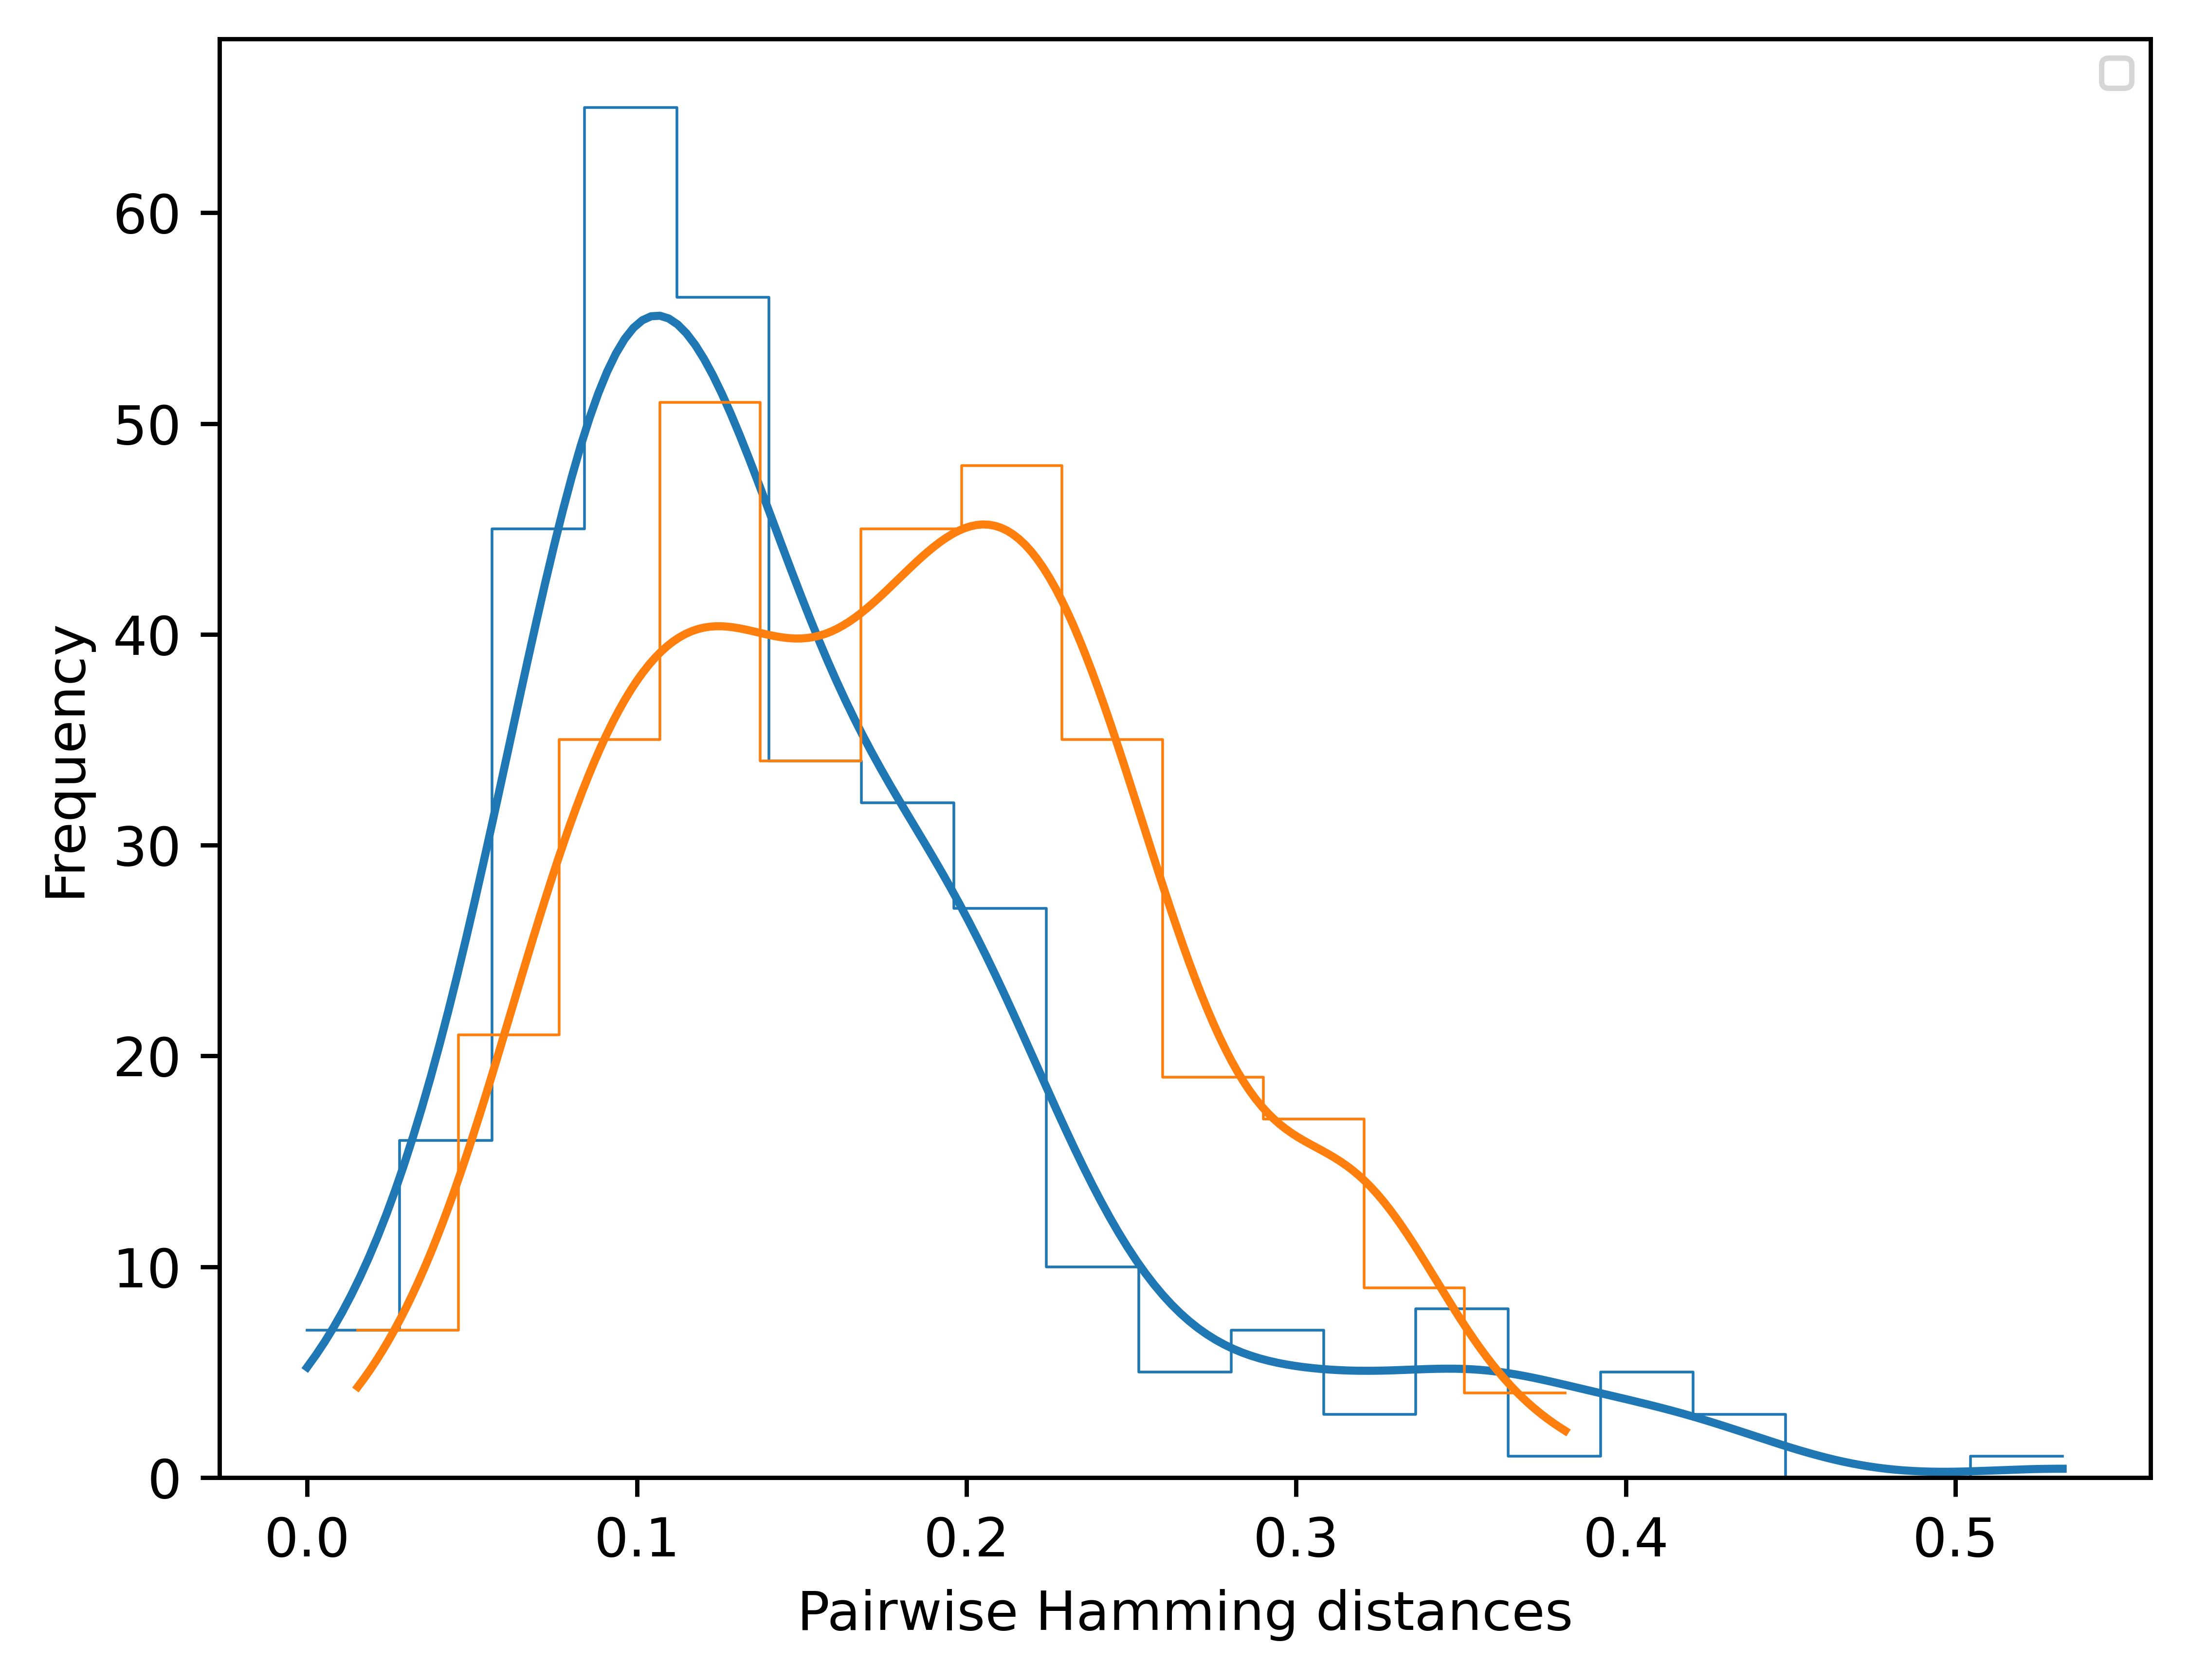

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots(dpi=800)
ax = sns.histplot(
    hamming_root_list_c,
    kde=True,
    linewidth=0.5,
    fill=False,
    element="step"
)
ax = sns.histplot(
    hamming_form_list_c,
    kde=True,
    linewidth=0.5,
    element="step",
    fill=False
)
plt.legend(loc='best',fontsize=7)
plt.xlabel('Pairwise Hamming distances',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('rootsvsformatives.pdf', format='pdf', transparent=True, bbox_inches='tight', dpi=1024)
plt.show()

# 5 PCA

We can now carry out a PCA of the data. We need a distance matrix for this purpose, which we have already created above. We start with the roots.

In [23]:
from sklearn.decomposition import PCA
transformer = PCA(n_components=2)
X = transformer.fit_transform(hamming_root_per_c)
print(transformer.explained_variance_ratio_)

[0.59089581 0.18479786]


In [24]:
x = list(zip(*list(X)))[0]
y = list(zip(*list(X)))[1]

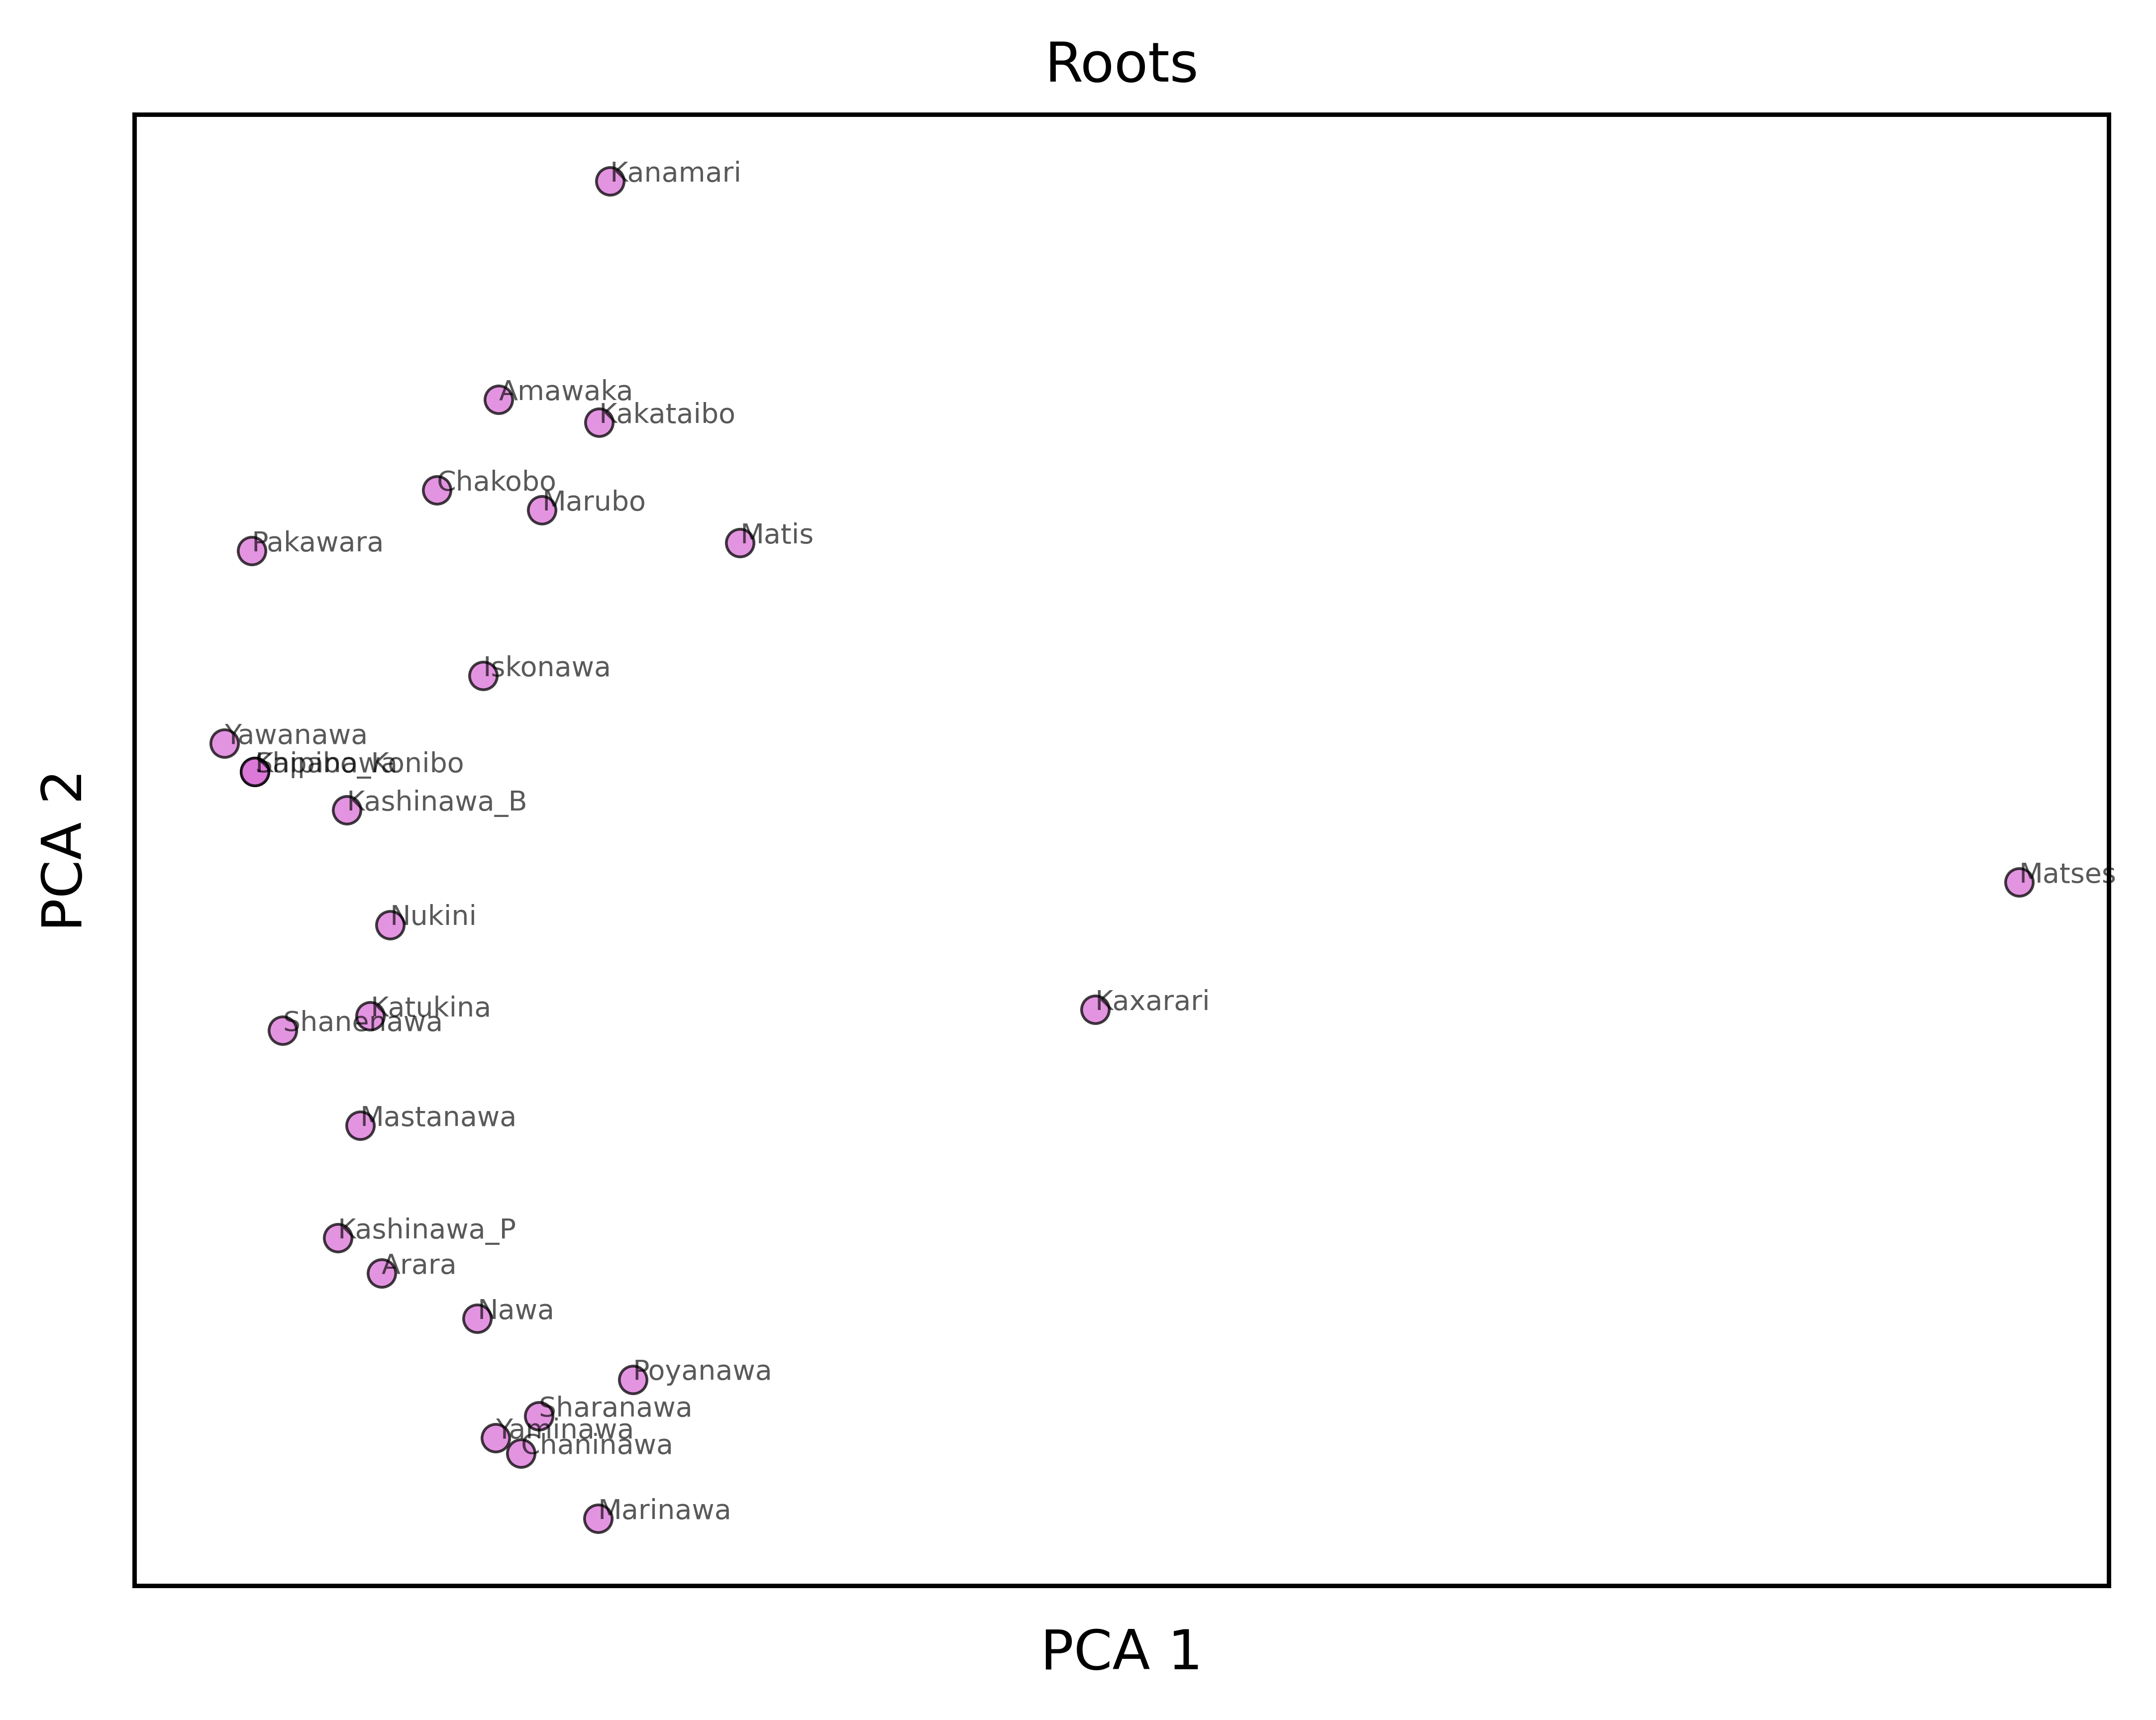

In [25]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(x)):
    ax.annotate(
        idx2lng[i], 
        color='k', 
        xy=(x[i],y[i]), 
        fontsize=5, 
        alpha=0.65
    )
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot(
    [x[i] for (i, _) in sorted(idx2lng.items())],
    [y[i] for (i, _) in sorted(idx2lng.items())],
    'o',
    color='orchid',
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor='k',
    alpha=0.75,
    fillstyle='full',
    clip_on=True
)

plt.grid(False)
plt.title('Roots',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'PCA 2',fontsize=10)
plt.xlabel(r'PCA 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('root_2D.pdf', format='pdf', transparent=True, bbox_inches='tight', dpi=1024)
plt.show()

Now, we work with the forms.

In [26]:
transformer_b = PCA(n_components=2)
X_b = transformer_b.fit_transform(hamming_form_per_c)
print(transformer_b.explained_variance_ratio_)



[0.53586824 0.173683  ]


In [27]:
x_b =list(zip(*list(X_b)))[0]
y_b =list(zip(*list(X_b)))[1]

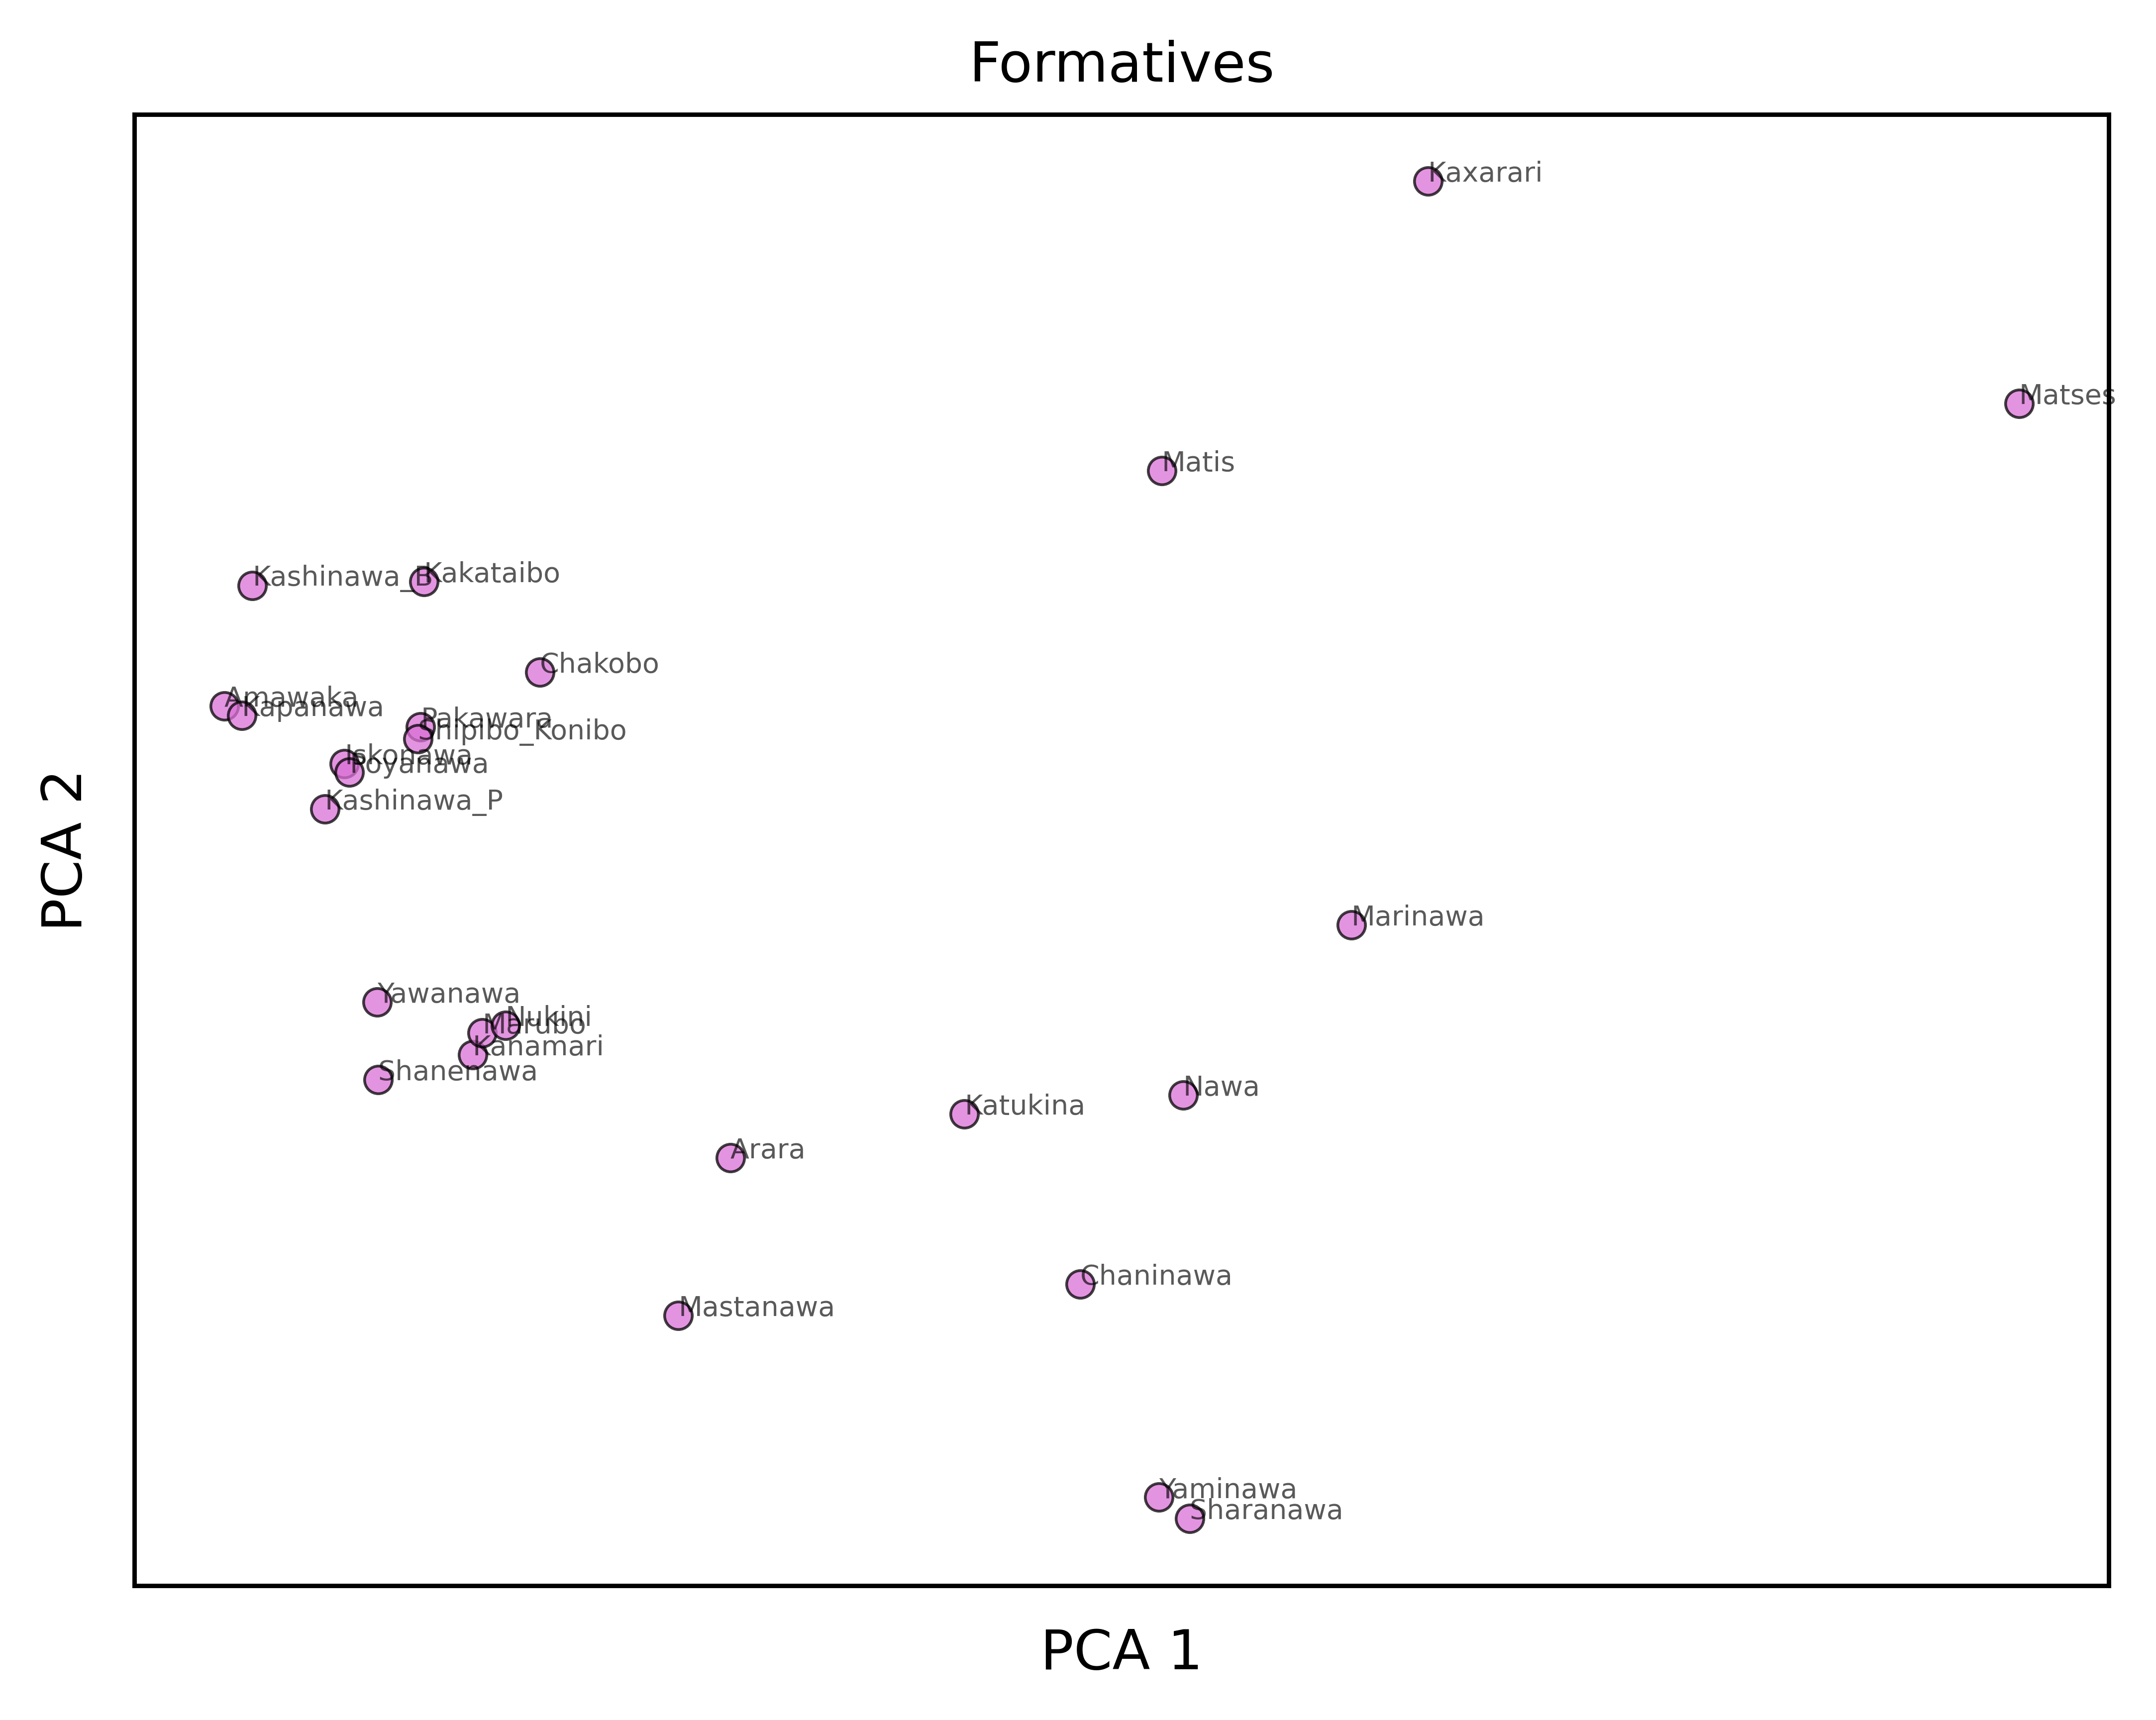

In [28]:
fig, ax = plt.subplots(dpi=800)

for i in range(len(x_b)):
    ax.annotate(
        idx2lng[i], 
        color='k', 
        xy=(x_b[i],y_b[i]), 
        fontsize=5, 
        alpha=0.65
    )
#    ax.annotate(labels[i], weight='demi', color='r', xy=(x[i]-1.5,y[i]-1.5), fontsize=4, alpha=0.85)

ax.plot(
    [x_b[i] for (i, _) in sorted(idx2lng.items())],
    [y_b[i] for (i, _) in sorted(idx2lng.items())],
    'o',
    color='orchid',
    markersize=5,
    markeredgewidth=0.5,
    markeredgecolor='k',
    alpha=0.75,
    fillstyle='full',
    clip_on=True
)

plt.grid(False)
plt.title('Formatives',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'PCA 2',fontsize=10)
plt.xlabel(r'PCA 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
plt.savefig('formative_2D.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=1024)
plt.show()